End to End Project to understand Datascience with simple dataset
-----------------------------------------------------------------

In [64]:
# import all necessary libraries
import pandas as pd

# for numeric
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style


In [65]:
# Get the data
full_titanic_df = pd.read_csv('full.csv')
full_titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [66]:
# To do the machine learning /predictions we will split the data into two data frames
# training dataset
# testing dataset

training_data = full_titanic_df.sample(frac=0.8, random_state=25)
testing_data = full_titanic_df.drop(training_data.index)

In [67]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
801,802,1.0,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,...,S,384.0,"Collyer, Mrs. Charlotte Annie (née Tate)",31.0,"Bishopstoke, Hampshire, England",Southampton,"Payette, Idaho, US",14,NaN,2.0
532,533,0.0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,...,C,798.0,"Elias, Mr. Joseph Jr.",15.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0
1105,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,...,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
619,620,0.0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,...,S,421.0,"Gavey, Mr. Laurence",26.0,"Guernsey, Channel Islands",Southampton,"Elizabeth, New Jersey, US",NaN,NaN,2.0
865,866,1.0,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,...,S,363.0,"Byström, Miss Karolina",42.0,New York City,Southampton,New York City,?,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,575,0.0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,...,S,1166.0,"Rush, Mr. Alfred George John",16.0,"Strood, Kent, England",Southampton,"Detroit, Michigan, US",NaN,NaN,3.0
715,716,0.0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,...,S,1225.0,"Søholt, Mr. Peter Andreas Lauritz Andersen",19.0,"Ålesund, Møre og Romsdal, Norway",Southampton,"Minneapolis, Minnesota, US",NaN,NaN,3.0
212,213,0.0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,...,S,1126.0,"Perkin, Mr. John Henry",22.0,"Holsworthy, Devon, England",Southampton,"Saskatoon, Saskatchewan, Canada",NaN,NaN,3.0
698,699,0.0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,...,C,296.0,"Thayer, Mr. John Borland II",49.0,"Haverford, Pennsylvania, US",Cherbourg,"Haverford, Pennsylvania, US",NaN,NaN,1.0


In [68]:
testing_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,...,S,1193.0,"Sandström, Miss Marguerite Rut",4.0,"Motala, Östergötland, Sweden",Southampton,"San Francisco, US",13,NaN,3.0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,...,S,1286.0,"Veström, Miss Hulda Amanda Adolfina",14.0,"Salmunds, Gotland, Sweden",Southampton,"Los Angeles, US",NaN,NaN,3.0
20,21,0.0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,...,S,416.0,"Fynney, Mr. Joseph J.",35.0,"Liverpool, Merseyside, England, UK",Southampton,"Montreal, Quebec, Canada",NaN,322M,2.0
22,23,1.0,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,...,Q,1014.0,"McGowan, Miss Anna F. ""Annie""",16.0,"Massbrook, Mayo, Ireland",Queenstown,"Chicago, Illinois, US",13,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,...,C,218.0,"Nourney, Mr. Alfred[71][72]",20.0,"Cologne, German Empire[note 2]",Cherbourg,"New York, New York, US",7,NaN,1.0
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,...,Q,1064.0,"Naughton, Miss Hannah",21.0,"Donoughmore, Ireland",Queenstown,New York City,NaN,NaN,3.0
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,...,Q,206.0,"Minahan, Mrs. Lillian E. (née Thorpe)",37.0,"Fond du Lac, Wisconsin, US",Southampton,"Fond du Lac, Wisconsin, US",14,NaN,1.0
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,...,S,869.0,"Henriksson, Miss Jenny Lovisa",28.0,"Stockholm, Sweden",Southampton,"Iron Mountain, Michigan, US",NaN,3MB,3.0


Data Exploration/Analysis
--------------------------

In [69]:
training_data.info()
# to understand the columns and colums with no/empty values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 801 to 463
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1047 non-null   int64  
 1   Survived     710 non-null    float64
 2   Pclass       1047 non-null   int64  
 3   Name         1047 non-null   object 
 4   Sex          1047 non-null   object 
 5   Age          834 non-null    float64
 6   SibSp        1047 non-null   int64  
 7   Parch        1047 non-null   int64  
 8   Ticket       1047 non-null   object 
 9   Fare         1046 non-null   float64
 10  Cabin        235 non-null    object 
 11  Embarked     1045 non-null   object 
 12  WikiId       1042 non-null   float64
 13  Name_wiki    1042 non-null   object 
 14  Age_wiki     1040 non-null   float64
 15  Hometown     1042 non-null   object 
 16  Boarded      1042 non-null   object 
 17  Destination  1042 non-null   object 
 18  Lifeboat     394 non-null    object 
 19  Body 

In [70]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1047.000000,710.000000,1047.000000,834.000000,1047.000000,1047.000000,1046.000000,1042.000000,1040.000000,1042.00000
mean,661.662846,0.380282,2.284623,30.180360,0.513849,0.399236,34.837707,657.144914,29.586538,2.28119
std,374.489200,0.485798,0.832641,14.474236,1.073561,0.883847,55.539236,380.670452,13.810726,0.83546
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.00000
25%,344.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000,330.500000,21.000000,2.00000
50%,667.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000,643.500000,28.000000,3.00000
75%,985.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,988.750000,38.000000,3.00000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.00000


In [71]:
training_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
801,802,1.0,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,...,S,384.0,"Collyer, Mrs. Charlotte Annie (née Tate)",31.0,"Bishopstoke, Hampshire, England",Southampton,"Payette, Idaho, US",14,NaN,2.0
532,533,0.0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,...,C,798.0,"Elias, Mr. Joseph Jr.",15.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0
1105,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,...,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
619,620,0.0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,...,S,421.0,"Gavey, Mr. Laurence",26.0,"Guernsey, Channel Islands",Southampton,"Elizabeth, New Jersey, US",NaN,NaN,2.0
865,866,1.0,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,...,S,363.0,"Byström, Miss Karolina",42.0,New York City,Southampton,New York City,?,NaN,2.0
221,222,0.0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,...,S,351.0,"Bracken, Mr. James H.",29.0,"Lake Arthur, New Mexico, US",Southampton,"Lake Arthur, New Mexico, US",NaN,NaN,2.0
1274,1275,NaN,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.1000,...,S,1018.0,"McNamee, Mrs. Eileen (née O'Leary)",19.0,"Salisbury, Wiltshire, England",Southampton,"Philadelphia, Pennsylvania, US",NaN,53MB,3.0
573,574,1.0,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,...,Q,931.0,"Kelly, Miss Mary",22.0,"Castlepollard, Westmeath, Ireland",Queenstown,New York City,D,NaN,3.0
657,658,0.0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,...,Q,685.0,"Bourke, Mrs. Catherine (née McHugh)",32.0,"Carrowskehine, Mayo, Ireland",Queenstown,"Chicago, Illinois, US",NaN,NaN,3.0
639,640,0.0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,...,S,1254.0,"Thorneycroft, Mr. Percival Thomas",36.0,"Maidstone, Kent, England",Southampton,"Clinton, New York, US",NaN,NaN,3.0


In [72]:
training_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId',
       'Name_wiki', 'Age_wiki', 'Hometown', 'Boarded', 'Destination',
       'Lifeboat', 'Body', 'Class'], dtype=object)

* What are the factors that could contribute to a high survival rate?
    * Passenger Id, Ticket, Name these definetly have no factor 
    * Correlation might help us to find the relation/impact that a variable might have on survival.
* This is where we can summarize with plots

In [73]:
women = training_data[training_data['Sex'] == 'female']
women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
801,802,1.0,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,...,S,384.0,"Collyer, Mrs. Charlotte Annie (née Tate)",31.0,"Bishopstoke, Hampshire, England",Southampton,"Payette, Idaho, US",14,NaN,2.0
1105,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,...,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
865,866,1.0,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,...,S,363.0,"Byström, Miss Karolina",42.0,New York City,Southampton,New York City,?,NaN,2.0
1274,1275,NaN,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.1000,...,S,1018.0,"McNamee, Mrs. Eileen (née O'Leary)",19.0,"Salisbury, Wiltshire, England",Southampton,"Philadelphia, Pennsylvania, US",NaN,53MB,3.0
573,574,1.0,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,...,Q,931.0,"Kelly, Miss Mary",22.0,"Castlepollard, Westmeath, Ireland",Queenstown,New York City,D,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,1052,NaN,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,...,Q,1224.0,"Smyth, Miss Julia",17.0,"Kilcogy, Cavan, Ireland",Queenstown,New York City,13,NaN,3.0
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,...,Q,733.0,"Connolly, Miss Catherine ""Kate""",35.0,"Bank Place, Tipperary, Ireland",Queenstown,"Dobbs Ferry, New York, US",NaN,NaN,3.0
362,363,0.0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,...,C,673.0,"Barbarah, Mrs. Katarin Dawud",45.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0
483,484,1.0,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,...,S,1268.0,"Turkula, Mrs. Hedvig",63.0,"Jalasjärvi, Southern Ostrobothnia, Finland",Southampton,"Hibbing, Minnesota, US",15,NaN,3.0


In [74]:
men = training_data[training_data['Sex'] == 'male']
men

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
532,533,0.0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,...,C,798.0,"Elias, Mr. Joseph Jr.",15.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0
619,620,0.0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,...,S,421.0,"Gavey, Mr. Laurence",26.0,"Guernsey, Channel Islands",Southampton,"Elizabeth, New Jersey, US",NaN,NaN,2.0
221,222,0.0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,...,S,351.0,"Bracken, Mr. James H.",29.0,"Lake Arthur, New Mexico, US",Southampton,"Lake Arthur, New Mexico, US",NaN,NaN,2.0
639,640,0.0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,...,S,1254.0,"Thorneycroft, Mr. Percival Thomas",36.0,"Maidstone, Kent, England",Southampton,"Clinton, New York, US",NaN,NaN,3.0
1203,1204,NaN,3,"Sadowitz, Mr. Harry",male,NaN,0,0,LP 1588,7.5750,...,S,1173.0,"Sadowitz, Mr. Harry",17.0,"London, England",Southampton,"Providence, Rhode Island, US",NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,575,0.0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,...,S,1166.0,"Rush, Mr. Alfred George John",16.0,"Strood, Kent, England",Southampton,"Detroit, Michigan, US",NaN,NaN,3.0
715,716,0.0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,...,S,1225.0,"Søholt, Mr. Peter Andreas Lauritz Andersen",19.0,"Ålesund, Møre og Romsdal, Norway",Southampton,"Minneapolis, Minnesota, US",NaN,NaN,3.0
212,213,0.0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,...,S,1126.0,"Perkin, Mr. John Henry",22.0,"Holsworthy, Devon, England",Southampton,"Saskatoon, Saskatchewan, Canada",NaN,NaN,3.0
698,699,0.0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,...,C,296.0,"Thayer, Mr. John Borland II",49.0,"Haverford, Pennsylvania, US",Cherbourg,"Haverford, Pennsylvania, US",NaN,NaN,1.0


* If we come up with a histogram with survived vs not survived for male and female this give us more information about data set

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

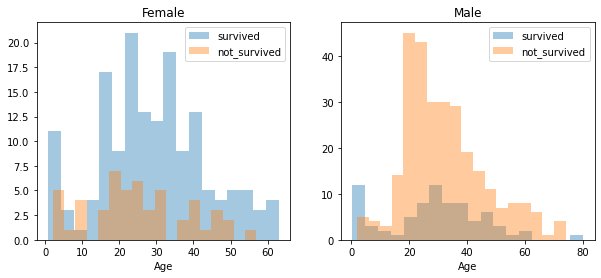

In [75]:
survived = 'survived'
not_survived = 'not_survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label= survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=18, label= not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label= survived, ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=18, label= not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')



C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


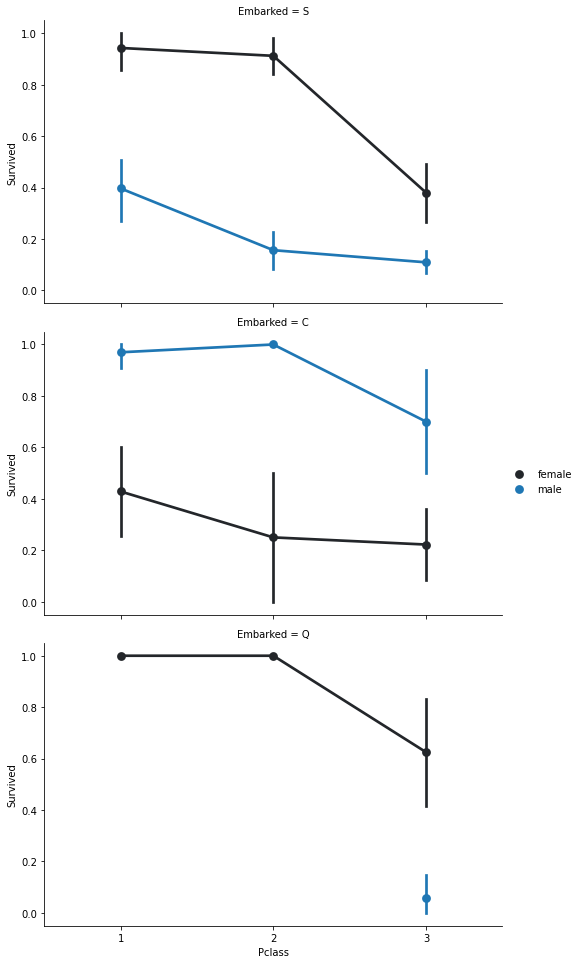

In [76]:
FacetGrid = sns.FacetGrid(training_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

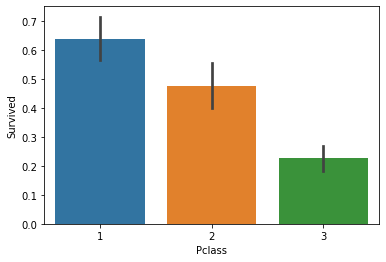

In [77]:
sns.barplot(x='Pclass', y='Survived', data=training_data)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


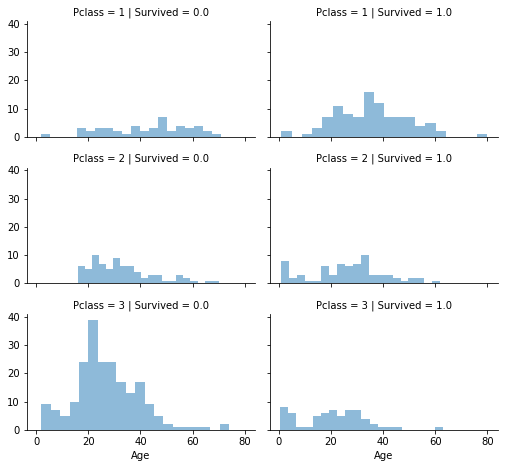

In [78]:
grid = sns.FacetGrid(training_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Data Preprocessing
-------------------

In [79]:
training_data = training_data.drop(['PassengerId'], axis=1)

Dealing with missing data
--------------------------

In [80]:
training_data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
801,1.0,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,384.0,"Collyer, Mrs. Charlotte Annie (née Tate)",31.0,"Bishopstoke, Hampshire, England",Southampton,"Payette, Idaho, US",14,NaN,2.0
532,0.0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C,798.0,"Elias, Mr. Joseph Jr.",15.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0
1105,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
619,0.0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S,421.0,"Gavey, Mr. Laurence",26.0,"Guernsey, Channel Islands",Southampton,"Elizabeth, New Jersey, US",NaN,NaN,2.0
865,1.0,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S,363.0,"Byström, Miss Karolina",42.0,New York City,Southampton,New York City,?,NaN,2.0
221,0.0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S,351.0,"Bracken, Mr. James H.",29.0,"Lake Arthur, New Mexico, US",Southampton,"Lake Arthur, New Mexico, US",NaN,NaN,2.0
1274,NaN,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.1000,NaN,S,1018.0,"McNamee, Mrs. Eileen (née O'Leary)",19.0,"Salisbury, Wiltshire, England",Southampton,"Philadelphia, Pennsylvania, US",NaN,53MB,3.0
573,1.0,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q,931.0,"Kelly, Miss Mary",22.0,"Castlepollard, Westmeath, Ireland",Queenstown,New York City,D,NaN,3.0
657,0.0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q,685.0,"Bourke, Mrs. Catherine (née McHugh)",32.0,"Carrowskehine, Mayo, Ireland",Queenstown,"Chicago, Illinois, US",NaN,NaN,3.0
639,0.0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S,1254.0,"Thorneycroft, Mr. Percival Thomas",36.0,"Maidstone, Kent, England",Southampton,"Clinton, New York, US",NaN,NaN,3.0


In [81]:
import re
deck = { "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [training_data, testing_data]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

training_data = training_data.drop(['Cabin'], axis=1)
testing_data = testing_data.drop(['Cabin'], axis=1)


In [82]:
training_data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Deck
801,1.0,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,S,384.0,"Collyer, Mrs. Charlotte Annie (née Tate)",31.0,"Bishopstoke, Hampshire, England",Southampton,"Payette, Idaho, US",14,NaN,2.0,8
532,0.0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,C,798.0,"Elias, Mr. Joseph Jr.",15.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0,8
1105,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0,8
619,0.0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,S,421.0,"Gavey, Mr. Laurence",26.0,"Guernsey, Channel Islands",Southampton,"Elizabeth, New Jersey, US",NaN,NaN,2.0,8
865,1.0,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,S,363.0,"Byström, Miss Karolina",42.0,New York City,Southampton,New York City,?,NaN,2.0,8
221,0.0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,S,351.0,"Bracken, Mr. James H.",29.0,"Lake Arthur, New Mexico, US",Southampton,"Lake Arthur, New Mexico, US",NaN,NaN,2.0,8
1274,NaN,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.1000,S,1018.0,"McNamee, Mrs. Eileen (née O'Leary)",19.0,"Salisbury, Wiltshire, England",Southampton,"Philadelphia, Pennsylvania, US",NaN,53MB,3.0,8
573,1.0,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,Q,931.0,"Kelly, Miss Mary",22.0,"Castlepollard, Westmeath, Ireland",Queenstown,New York City,D,NaN,3.0,8
657,0.0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,Q,685.0,"Bourke, Mrs. Catherine (née McHugh)",32.0,"Carrowskehine, Mayo, Ireland",Queenstown,"Chicago, Illinois, US",NaN,NaN,3.0,8
639,0.0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,S,1254.0,"Thorneycroft, Mr. Percival Thomas",36.0,"Maidstone, Kent, England",Southampton,"Clinton, New York, US",NaN,NaN,3.0,8


In [83]:
data = [training_data, testing_data]
for dataset in data:
    mean = training_data["Age"].mean()
    std = training_data["Age"].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean-std, mean+std, size=is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = training_data["Age"].astype(int)

In [84]:
training_data["Age"].isnull().sum()

0

In [85]:
training_data["Embarked"].describe()

count     1045
unique       3
top          S
freq       727
Name: Embarked, dtype: object

In [86]:
# Replace with most frequent value
common_value = 'S'
data = [training_data, testing_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [87]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 801 to 463
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     710 non-null    float64
 1   Pclass       1047 non-null   int64  
 2   Name         1047 non-null   object 
 3   Sex          1047 non-null   object 
 4   Age          1047 non-null   int32  
 5   SibSp        1047 non-null   int64  
 6   Parch        1047 non-null   int64  
 7   Ticket       1047 non-null   object 
 8   Fare         1046 non-null   float64
 9   Embarked     1047 non-null   object 
 10  WikiId       1042 non-null   float64
 11  Name_wiki    1042 non-null   object 
 12  Age_wiki     1040 non-null   float64
 13  Hometown     1042 non-null   object 
 14  Boarded      1042 non-null   object 
 15  Destination  1042 non-null   object 
 16  Lifeboat     394 non-null    object 
 17  Body         107 non-null    object 
 18  Class        1042 non-null   float64
 19  Deck 

In [88]:
genders = {"male": 0, "female": 1}
data = [training_data, testing_data]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [89]:
### drop => Ticket
training_data = training_data.drop(['Ticket'], axis=1)
testing_data = testing_data.drop(['Ticket'], axis=1)

In [90]:
ports = { "S": 0, "C": 1, "Q": 2}
data = [training_data, testing_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

training_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Deck
801,1.0,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",1,31,1,1,26.2500,0,384.0,"Collyer, Mrs. Charlotte Annie (née Tate)",31.0,"Bishopstoke, Hampshire, England",Southampton,"Payette, Idaho, US",14,NaN,2.0,8
532,0.0,3,"Elias, Mr. Joseph Jr",0,17,1,1,7.2292,1,798.0,"Elias, Mr. Joseph Jr.",15.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0,8
1105,NaN,3,"Andersson, Miss. Ida Augusta Margareta",1,38,4,2,7.7750,0,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0,8
619,0.0,2,"Gavey, Mr. Lawrence",0,26,0,0,10.5000,0,421.0,"Gavey, Mr. Laurence",26.0,"Guernsey, Channel Islands",Southampton,"Elizabeth, New Jersey, US",NaN,NaN,2.0,8
865,1.0,2,"Bystrom, Mrs. (Karolina)",1,42,0,0,13.0000,0,363.0,"Byström, Miss Karolina",42.0,New York City,Southampton,New York City,?,NaN,2.0,8
221,0.0,2,"Bracken, Mr. James H",0,27,0,0,13.0000,0,351.0,"Bracken, Mr. James H.",29.0,"Lake Arthur, New Mexico, US",Southampton,"Lake Arthur, New Mexico, US",NaN,NaN,2.0,8
1274,NaN,3,"McNamee, Mrs. Neal (Eileen O'Leary)",1,19,1,0,16.1000,0,1018.0,"McNamee, Mrs. Eileen (née O'Leary)",19.0,"Salisbury, Wiltshire, England",Southampton,"Philadelphia, Pennsylvania, US",NaN,53MB,3.0,8
573,1.0,3,"Kelly, Miss. Mary",1,41,0,0,7.7500,2,931.0,"Kelly, Miss Mary",22.0,"Castlepollard, Westmeath, Ireland",Queenstown,New York City,D,NaN,3.0,8
657,0.0,3,"Bourke, Mrs. John (Catherine)",1,32,1,1,15.5000,2,685.0,"Bourke, Mrs. Catherine (née McHugh)",32.0,"Carrowskehine, Mayo, Ireland",Queenstown,"Chicago, Illinois, US",NaN,NaN,3.0,8
639,0.0,3,"Thorneycroft, Mr. Percival",0,32,1,0,16.1000,0,1254.0,"Thorneycroft, Mr. Percival Thomas",36.0,"Maidstone, Kent, England",Southampton,"Clinton, New York, US",NaN,NaN,3.0,8


# Feature Engineering

In [91]:

data = [training_data, testing_data]
for dataset in data:
    #dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <=11, 'Age'] = 0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age'] <=18) , 'Age'] = 1
    dataset.loc[(dataset['Age'] >18) & (dataset['Age'] <=22) , 'Age'] = 2
    dataset.loc[(dataset['Age'] >22) & (dataset['Age'] <=27) , 'Age'] = 3
    dataset.loc[(dataset['Age'] >27) & (dataset['Age'] <=33) , 'Age'] = 4
    dataset.loc[(dataset['Age'] >33) & (dataset['Age'] <=40) , 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40)] = 6

training_data['Age'].value_counts()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Deck
801,1.0,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",1,4,1,1,26.2500,0,384.0,"Collyer, Mrs. Charlotte Annie (née Tate)",31.0,"Bishopstoke, Hampshire, England",Southampton,"Payette, Idaho, US",14,NaN,2.0,8
532,0.0,3,"Elias, Mr. Joseph Jr",0,1,1,1,7.2292,1,798.0,"Elias, Mr. Joseph Jr.",15.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0,8
1105,NaN,3,"Andersson, Miss. Ida Augusta Margareta",1,5,4,2,7.7750,0,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0,8
619,0.0,2,"Gavey, Mr. Lawrence",0,3,0,0,10.5000,0,421.0,"Gavey, Mr. Laurence",26.0,"Guernsey, Channel Islands",Southampton,"Elizabeth, New Jersey, US",NaN,NaN,2.0,8
865,6.0,6,6,6,6,6,6,6.0000,6,6.0,6,6.0,6,6,6,6,6,6.0,6
221,0.0,2,"Bracken, Mr. James H",0,3,0,0,13.0000,0,351.0,"Bracken, Mr. James H.",29.0,"Lake Arthur, New Mexico, US",Southampton,"Lake Arthur, New Mexico, US",NaN,NaN,2.0,8
1274,NaN,3,"McNamee, Mrs. Neal (Eileen O'Leary)",1,2,1,0,16.1000,0,1018.0,"McNamee, Mrs. Eileen (née O'Leary)",19.0,"Salisbury, Wiltshire, England",Southampton,"Philadelphia, Pennsylvania, US",NaN,53MB,3.0,8
573,6.0,6,6,6,6,6,6,6.0000,6,6.0,6,6.0,6,6,6,6,6,6.0,6
657,0.0,3,"Bourke, Mrs. John (Catherine)",1,4,1,1,15.5000,2,685.0,"Bourke, Mrs. Catherine (née McHugh)",32.0,"Carrowskehine, Mayo, Ireland",Queenstown,"Chicago, Illinois, US",NaN,NaN,3.0,8
639,0.0,3,"Thorneycroft, Mr. Percival",0,4,1,0,16.1000,0,1254.0,"Thorneycroft, Mr. Percival Thomas",36.0,"Maidstone, Kent, England",Southampton,"Clinton, New York, US",NaN,NaN,3.0,8


In [94]:

training_data['Age'].value_counts()


6    203
4    198
5    176
3    161
2    136
1    102
0     71
Name: Age, dtype: int64

In [98]:
X_train = training_data.drop('Name', axis=1)
Y_train = training_data['Survived']
X_train = training_data.drop('Survived', axis=1)

In [96]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [100]:
# Build a model using existing libraries
sdg = linear_model.SGDClassifier(max_iter=5, tol=None)
# sdg.fit(X_train, Y_train)
# sdg.score(X_train, Y_train)